In [1]:
#Logistic Regression

In [ ]:
# why we needed logistic regression
# to slove the categorical problem ,
# Logistic regression is specifically designed to predict probabilities and then classify into classes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [4]:
data=pd.read_csv('Diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
WE are trying to predict diabetes from age

In [6]:
data.describe()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
x=data[['Age']] #  x is inout feature
y=data.Outcome # y is  target 

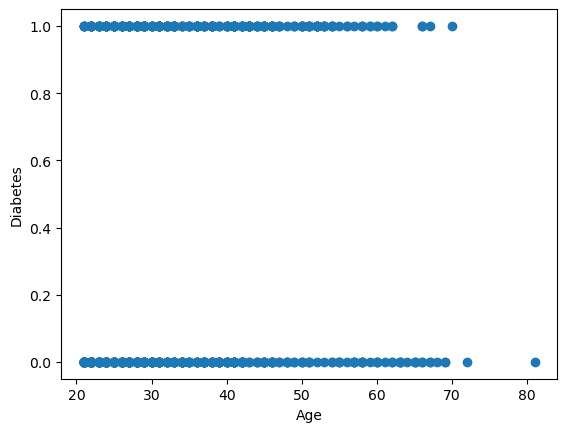

In [10]:
plt.scatter(data.Age , data.Outcome)
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.show()

In [11]:
 # logistic equation z=b0+b1*age

In [ ]:
# to find target in logistic it uses sigmoid function
y= 1/1+ e pow -z

In [ ]:
#sigmoid 
1/1+e pow(-1)

In [ ]:
output  in the range of 0 to 1  => (0,1)

In [ ]:
we set threshold  = 0.5 
if output is greater or equals to threshold then it is 1 else 0

In [ ]:
output may be 0, 0.1 , 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, .......,

In [14]:
#split data
xtrain , xtest, ytrain, ytest=train_test_split(x, y , test_size=0.2, random_state=8)


In [15]:
log_model=LogisticRegression()
log_model.fit(xtrain, ytrain)

LogisticRegression()

In [16]:
log_model.intercept_

array([-1.82013655])

In [17]:
log_model.coef_

array([[0.03575763]])

In [ ]:
# predicition
Age=40

In [18]:
log_model.predict([[40]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [19]:
#by making dataframe

In [24]:
pred_new=pd.DataFrame({
    'Age':[50]})

In [25]:
print(log_model.predict(pred_new))

[0]


In [26]:
# .predict_proba for finding  probabbilites
print(log_model.predict_proba(pred_new))

[[0.50806309 0.49193691]]


In [27]:
#evaluation

In [ ]:
Actual        Predicted
0             0 -> correct
              1 -> incorrect

1            0 -> incorrect
             1 -> correct

In [29]:
xtest.shape

(154, 1)

In [36]:
yprediction=log_model.predict(xtest)

In [37]:
ytest

302    0
131    1
124    1
486    0
306    1
      ..
490    0
57     0
373    0
224    0
246    0
Name: Outcome, Length: 154, dtype: int64

In [38]:
yprediction

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [39]:
0 - 0 correct
1 - 1 correct
0 - 1 incorrect
1 - 0 incorrect

SyntaxError: invalid syntax (3539977045.py, line 1)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
accuracy=accuracy_score(ytest, yprediction)
print(f"The Accurcacy {accuracy:.2%}")

The Accurcacy 68.18%


In [45]:
cm=confusion_matrix(ytest, yprediction)
cm

array([[96,  6],
       [43,  9]], dtype=int64)